In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 

In [17]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [18]:
#partition Dtat
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [19]:
def train(data, degree):
    poly = PolynomialFeatures(degree = degree)
    X = poly.fit_transform(data[:, 0].reshape(-1, 1))
    y = data[:, 1].reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)

    return reg

In [20]:
# ret = train(trainData[0], 3)

# plt.scatter(testData[:, 0], testData[:, 1])
# X = PolynomialFeatures(degree = 3).fit_transform(testData[:, 0].reshape(-1, 1))
# testPred = ret.predict( X )
# plt.scatter(testData[:, 0], testPred)

# plt.show()

In [21]:
# def bias2_calc(testPred, testData):
#     num = len(testData)
#     y = testData[:, 1]
#     tot1 = 0
#     for i in range(0, num):
#         tot1 += testPred[i]
#     eFCap = tot1/ num
#     bias_2 = 0
#     for i in range(0, num):
#         bias_2 += (eFCap - y[i])**2
#     return bias_2

def bias2_calc(testPred, testData):
    num = len(testData)
    y = testData[:, 1]
    tot1 = 0
    for i in range(0, num):
        tot1 += (testPred[i] - y[i]) ** 2
    return tot1/num


def variance_calc(testPred, testData):
    num = len(testData)
    y = testData[:, 1]
    tot1 = 0
    for i in range(0, num):
        tot1 += testPred[i]
    eFCap = tot1/num
    tot2 = 0
    for i in range(0, num):
        tot2 += (testPred[i] - eFCap)**2
    tot2 = tot2/num
    return tot2


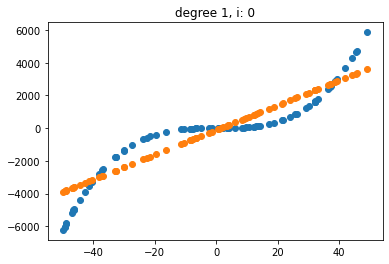

bias^2: [950366.95822659] variance: [5002670.11753667]


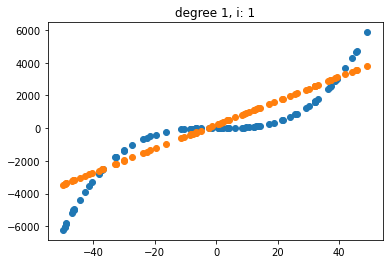

bias^2: [1177691.96861252] variance: [4687857.6893688]


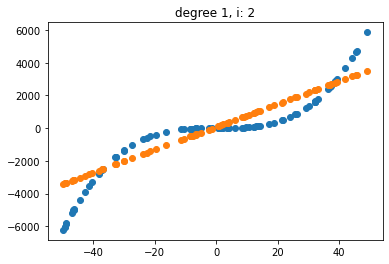

bias^2: [1129362.33212867] variance: [4259261.82152669]


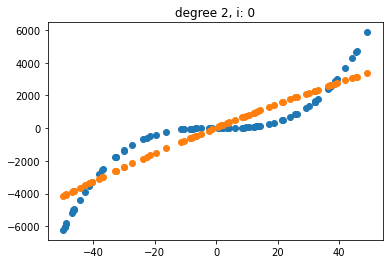

bias^2: [894389.84287957] variance: [5165884.48738314]


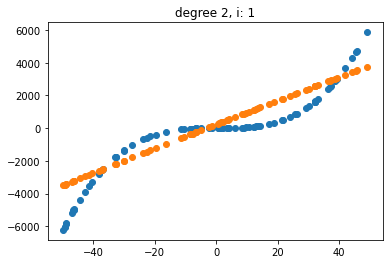

bias^2: [1162547.65861509] variance: [4713301.0740997]


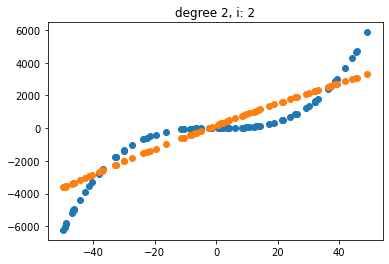

bias^2: [1067749.20956909] variance: [4356728.85852749]


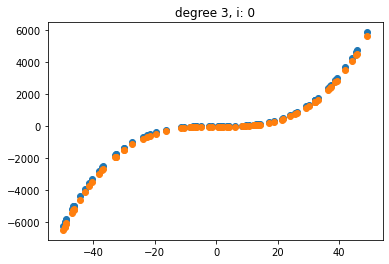

bias^2: [18600.90024212] variance: [6786900.85364314]


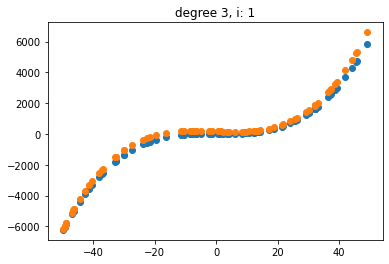

bias^2: [64852.03303448] variance: [7032236.54577316]


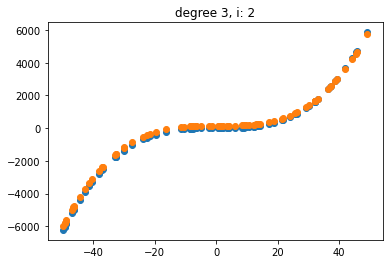

bias^2: [21099.97304795] variance: [6277021.01586103]


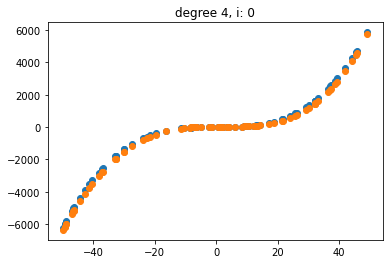

bias^2: [19153.53998143] variance: [6714682.87697631]


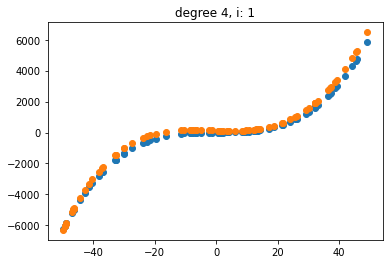

bias^2: [64110.12723842] variance: [7085163.47434369]


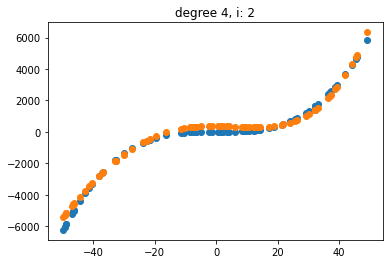

bias^2: [94248.16127884] variance: [5970480.91161548]


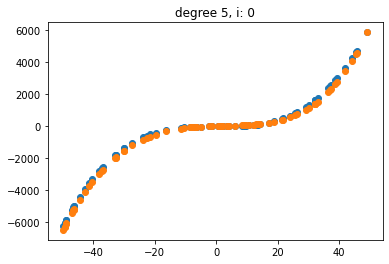

bias^2: [22003.26243402] variance: [6743928.12059216]


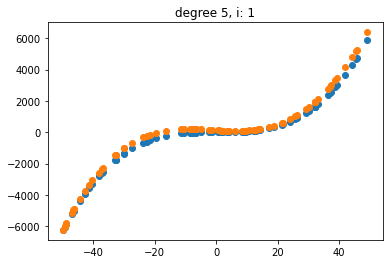

bias^2: [64066.63178117] variance: [7051996.1661777]


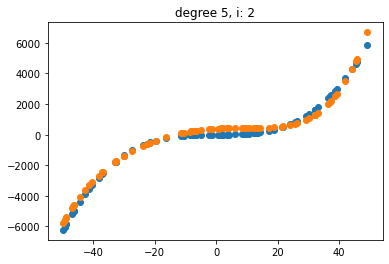

bias^2: [94013.54233652] variance: [6109740.66214466]


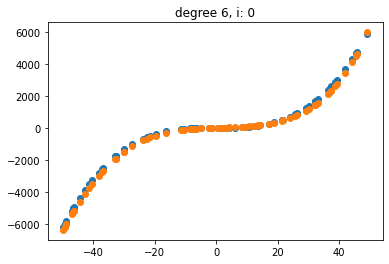

bias^2: [22170.88529449] variance: [6719896.48274968]


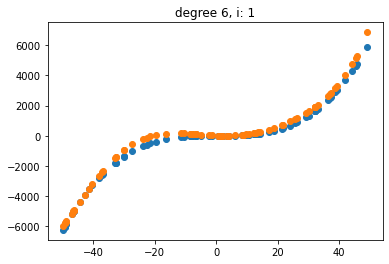

bias^2: [72741.67790387] variance: [7018353.24101989]


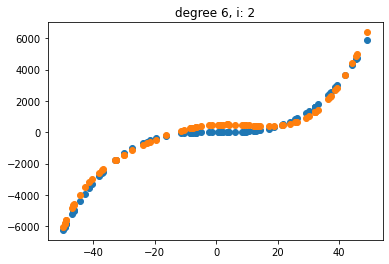

bias^2: [93710.9336645] variance: [6243720.27786434]


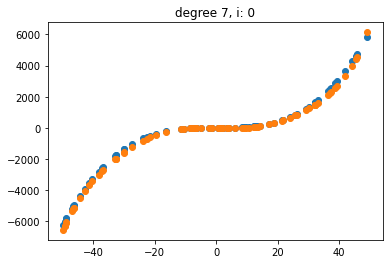

bias^2: [24914.67534321] variance: [6773572.16360207]


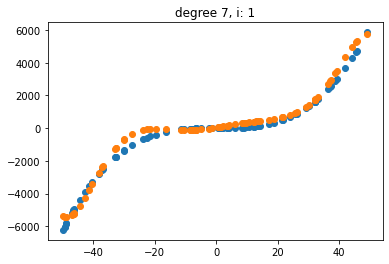

bias^2: [116800.30154658] variance: [6899338.27444524]


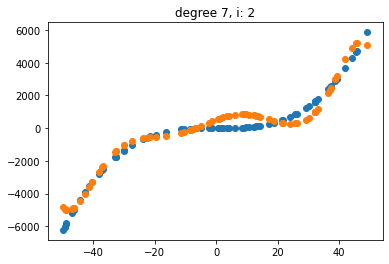

bias^2: [266131.11249982] variance: [5973932.94588587]


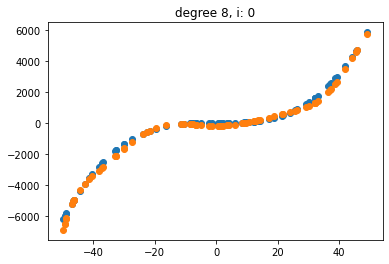

bias^2: [48299.65981674] variance: [6778367.99806494]


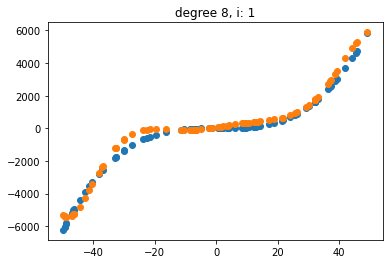

bias^2: [119055.43598239] variance: [6916528.12276316]


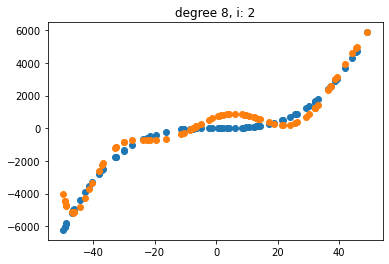

bias^2: [347971.523788] variance: [5922172.16537732]


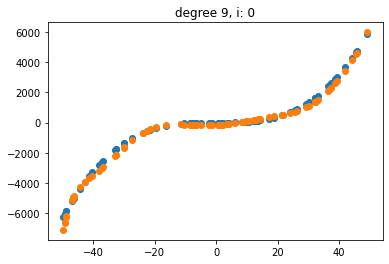

bias^2: [55791.436319] variance: [6842009.84737934]


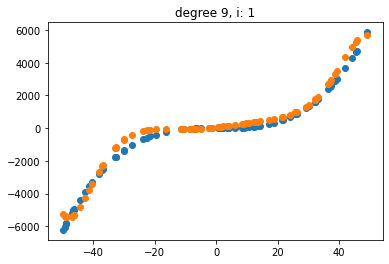

bias^2: [122666.86264626] variance: [6902224.59932301]


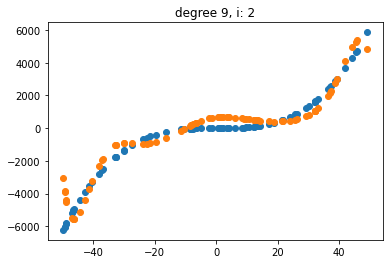

bias^2: [517680.33507415] variance: [5738924.39744562]


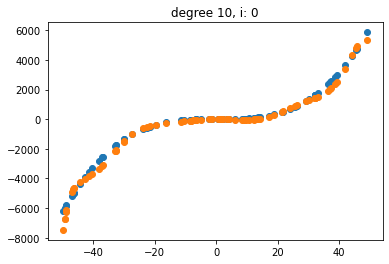

bias^2: [85974.24006433] variance: [6867361.66936399]


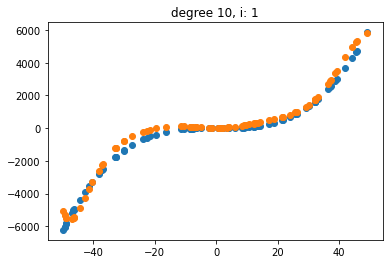

bias^2: [124619.95451857] variance: [6951612.43136297]


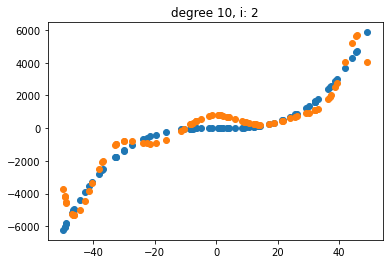

bias^2: [478416.62889175] variance: [5737145.65963571]


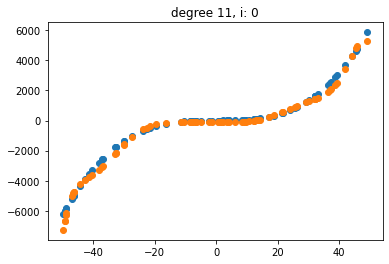

bias^2: [79514.28723317] variance: [6830626.12264998]


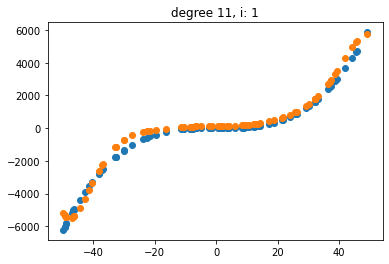

bias^2: [121171.23110252] variance: [6916660.62147748]


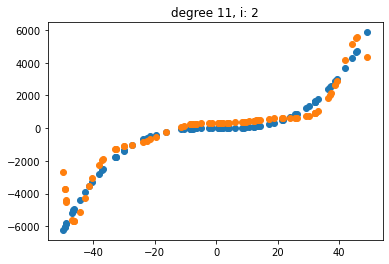

bias^2: [536896.86702044] variance: [5642867.75455477]


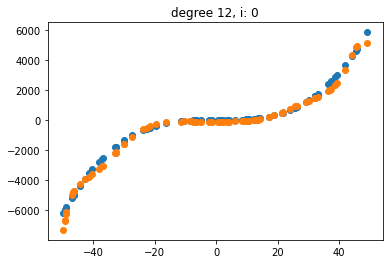

bias^2: [81707.80185385] variance: [6833003.0775368]


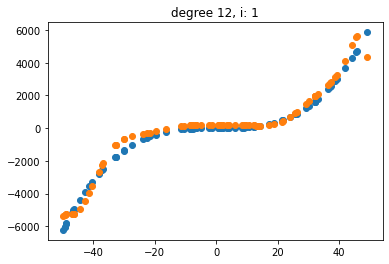

bias^2: [175161.56934342] variance: [6735756.43225717]


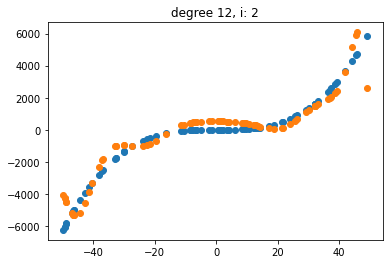

bias^2: [535417.59398833] variance: [5716591.16686158]


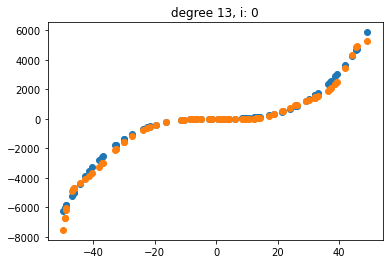

bias^2: [80442.98992784] variance: [6875512.75974819]


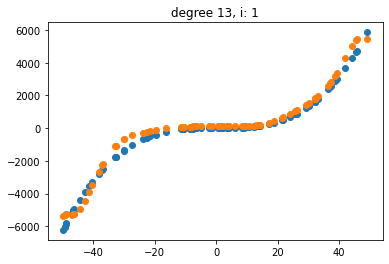

bias^2: [130188.09455754] variance: [6817710.96072189]


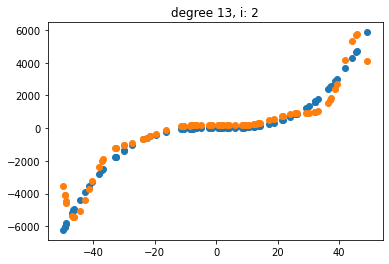

bias^2: [429589.83899739] variance: [5652088.45476591]


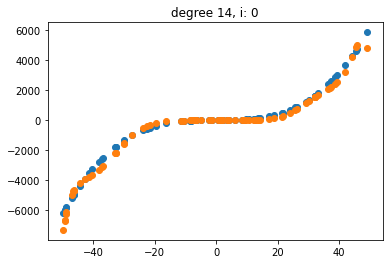

bias^2: [90980.53604311] variance: [6808306.84163628]


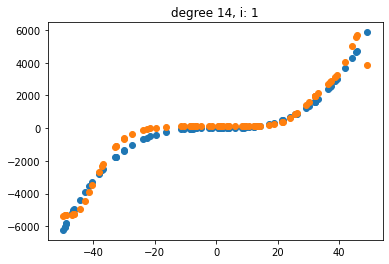

bias^2: [198101.03639525] variance: [6690241.20437677]


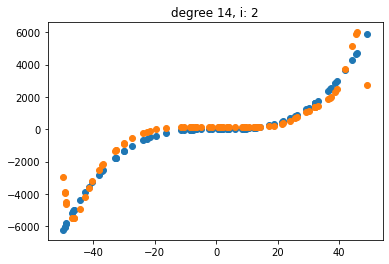

bias^2: [528857.54588192] variance: [5494267.67130982]


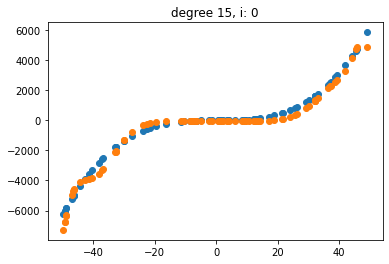

bias^2: [123636.9250393] variance: [6750734.67190605]


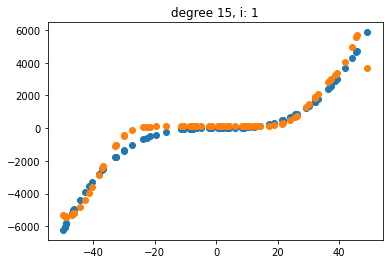

bias^2: [217032.589386] variance: [6679216.49631315]


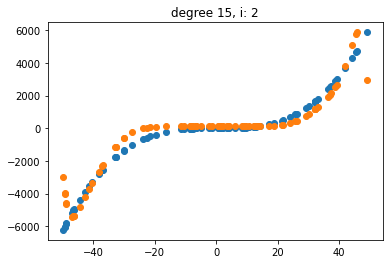

bias^2: [529195.68976457] variance: [5422726.87626911]


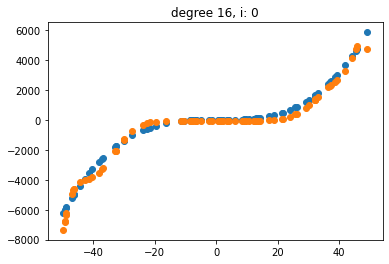

bias^2: [124432.29255192] variance: [6736982.01787203]


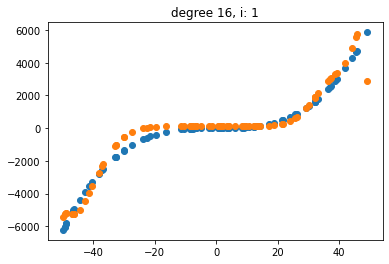

bias^2: [278640.14843238] variance: [6588414.41561907]


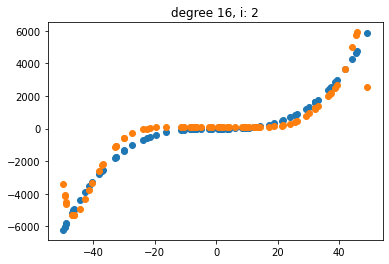

bias^2: [512684.66245448] variance: [5435716.60712199]


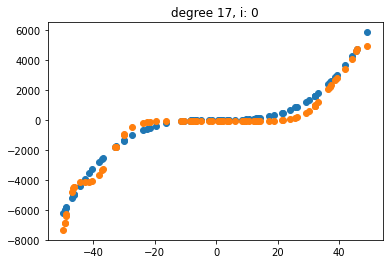

bias^2: [190329.74921795] variance: [6647411.4858264]


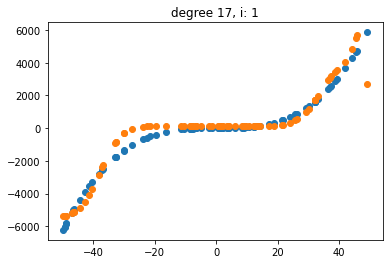

bias^2: [321760.06438122] variance: [6552919.98092131]


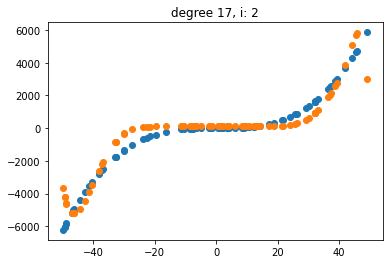

bias^2: [524024.15704475] variance: [5403676.10739927]


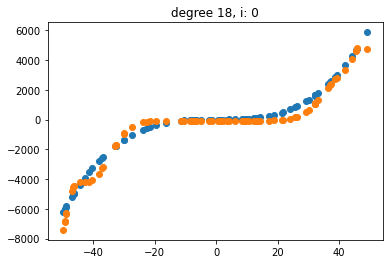

bias^2: [186238.1319627] variance: [6616654.24698385]


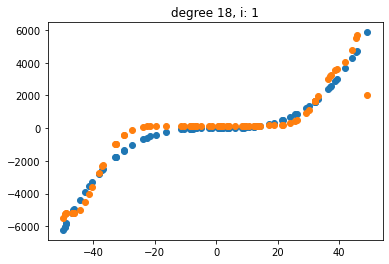

bias^2: [386255.20629988] variance: [6477503.80292165]


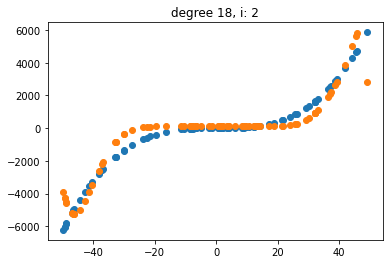

bias^2: [518894.10557044] variance: [5409774.02495109]


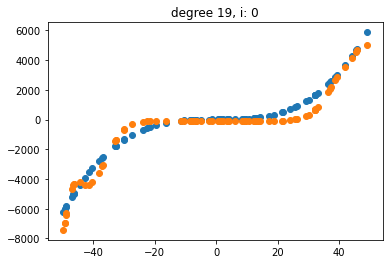

bias^2: [278606.65616965] variance: [6519240.20232291]


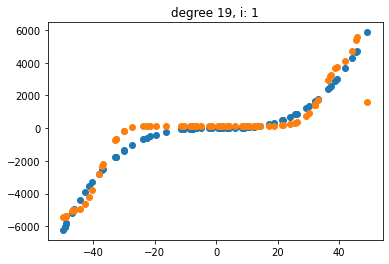

bias^2: [471717.73454837] variance: [6418077.65880621]


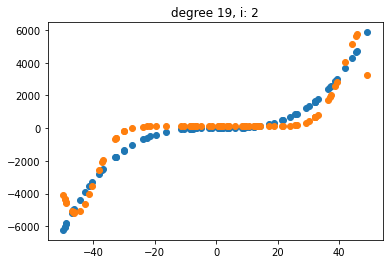

bias^2: [552527.53855886] variance: [5417282.50172392]


In [22]:
bias2Arr = [0] * 20 
varianceArr = [0] * 20
for deg in range(1, 20): # should be 1, 10
    for i in range(0, 3): #should be 0, 10
        ret = train(trainData[i], deg)
        plt.scatter(testData[:, 0], testData[:, 1])
        X = PolynomialFeatures(degree = deg).fit_transform(testData[:, 0].reshape(-1, 1))
        testPred = ret.predict( X )
        plt.scatter(testData[:, 0], testPred)
        plt.title('degree ' + str(deg) + ', i: ' + str(i))
        plt.show()
        print('bias^2: ' + str(bias2_calc(testPred, testData)) + ' variance: ' + str(variance_calc(testPred, testData)))
        bias2Arr[deg] += bias2_calc(testPred, testData)
        varianceArr[deg] += variance_calc(testPred, testData)
        

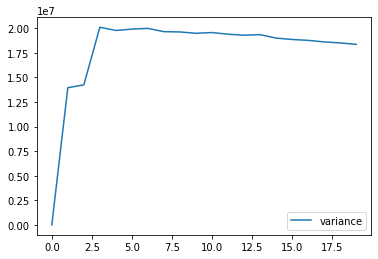

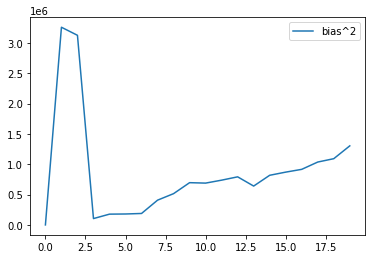

In [23]:
# plt.plot(bias2Arr, label='bias^2')
plt.plot(varianceArr, label='variance')
plt.legend()
plt.show()

plt.plot(bias2Arr, label='bias^2')
# plt.plot(varianceArr, label='variance')
plt.legend()
plt.show()